<a href="https://colab.research.google.com/github/dharmagnavyas/AI-Powered-Image-Classifier/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Powered Image Classifier: Leveraging SVM for Visual Recognition with Data Scraping and Model Persistence

### By:Dharmagna Vyas

### AIM: The primary goal of this project is to develop an efficient image classification system using Support Vector Machines (SVM) as the underlying algorithm. By leveraging the capabilities of SVM, the project aims to accurately categorize images of art paint brushes, ice cream cones, and burgers. The project also involves the process of data scraping to gather a diverse dataset, preprocessing techniques for image enhancement, and thorough model evaluation. Furthermore, the aim is to provide a practical demonstration of model deployment by saving and loading the trained model, enabling it to make predictions on new, user-supplied images. Through this, the project seeks to enhance understanding and proficiency in image classification, data preprocessing, and model deployment using machine learning techniques

In [ ]:
# Data:Images
# used python libraries to scrape the images

In [ ]:
#time taken to run one specific cell
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00
time: 524 µs (started: 2023-11-11 11:36:31 +00:00)


### Step 1: Data Collection

In [ ]:
!pip install bing-image-downloader

time: 6.54 s (started: 2023-11-11 11:36:31 +00:00)


In [ ]:
!mkdir myimages

time: 105 ms (started: 2023-11-11 11:36:38 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("Art Paint Brushes", limit= 30, output_dir="myimages",
                   adult_filter_off=True)


[%] Downloading Images to /content/myimages/Art Paint Brushes


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://vignette.wikia.nocookie.net/painting/images/f/fe/7.jpg/revision/latest?cb=20140824164508
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-DI9sTYuiMNc/U_3PRimwykI/AAAAAAAAGlY/iaPViGtrDwk/s1600/IMG_5066.JPG
[%] File Downloaded !

[%] Downloading Image #3 from https://www.mattierhodes.org/wp-content/uploads/2017/02/paint-brushes.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://fthmb.tqn.com/fWQQD7s0Jqyw623zmOWhb0hfNk4=/1280x1280/filters:fill(auto,1)/sb10064798n-001-56a6e6d13df78cf77290d9a3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i5.walmartimages.com/asr/cef781d1-7188-48e0-b538-c12a70529fcb.336996a15e2891a2e67b2f1814e90fad.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://images.pexels.com/photos/933377/pexels-photo-933377.jpeg?cs=srgb&amp;dl=close

In [ ]:
downloader.download("icecream cone", limit= 30, output_dir="myimages",
                   adult_filter_off=True)


[%] Downloading Images to /content/myimages/icecream cone


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://cdiabetes.com/wp-content/uploads/2014/07/ice-cream-cone.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.kitcheninnovationsinc.com/wp-content/uploads/2014/07/J218DISP-Ice-Cream.png
[%] File Downloaded !

[%] Downloading Image #3 from http://mariamindbodyhealth.com/wp-content/uploads/2011/05/ice-cream-cone.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://sparkpeo.hs.llnwd.net/e1/resize/1200w/assets/resource/slideshow/ice cream cone.jpg
[!] Issue getting: https://sparkpeo.hs.llnwd.net/e1/resize/1200w/assets/resource/slideshow/ice cream cone.jpg
[!] Error:: URL can't contain control characters. '/e1/resize/1200w/assets/resource/slideshow/ice cream cone.jpg' (found at least ' ')
[%] Downloading Image #4 from https://lifesizestatue.com/images/largeicecreamconestatue_130021m-h.jpg
[%] File Downloaded !

[%

In [ ]:
downloader.download("burger", limit= 30, output_dir="myimages",
                   adult_filter_off=True)


[%] Downloading Images to /content/myimages/burger


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://foodisinthehouse.com/wp-content/uploads/2020/03/amirali-mirhashemian-jh5XyK4Rr3Y-unsplash-scaled.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn2.tmbi.com/TOH/Images/Photos/37/1200x1200/exps28800_UG143377D12_18_1b_RMS.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/_HPXWOvg7RcM/TSAlV0uVAnI/AAAAAAAAACo/kdGktUbFux8/s1600/burger.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://natashaskitchen.com/wp-content/uploads/2019/04/Best-Burger-5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/b6/51/c4/b651c473c595f728118644568221637e.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/d99e3250294309.58cc6bd862170.jpg
[Error]Invalid image, not saving https://mir-s3-cdn-cf.behance.n

### Step 2: Data Preprocessing

In [ ]:
import numpy as np
a = np.array([[1,2,3,4,5],[4,5,6,7,9]])
a.ndim
#how to convert 2 dimension to 1 dimension or matrix to vector
#flatten()
a.flatten()
#images are always in form of matrix can flatten using flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 9])

time: 3.87 ms (started: 2023-11-11 12:41:09 +00:00)


In [ ]:
#preprocessing
# 1.resizing
# 2.flatten

import os #for using different folders
import matplotlib.pyplot as plt #displaying image
import numpy as np
from skimage.io import imread #reading image
from skimage.transform import resize #to resize our images

target = []
images=[]
flatten_data=[]

DataDir = '/content/myimages'
categories = ['Art Paint Brushes','icecream cone','burger']

for category in categories:
    class_num = categories.index(category) #label encoding the values as we have many images
    path = os.path.join(DataDir,category) #created a path to use all the images
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        #plt.imshow(img_array)
        img_resized = resize(img_array,(150,150,3)) #to resize images normalizes value from 0 to 1
        flatten_data.append(img_resized.flatten()) #flattening the image
        images.append(img_resized)
        target.append(class_num)

flatten_data = np. array(flatten_data)
target = np.array(target)
images= np.array(images)

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


time: 1min 55s (started: 2023-11-11 12:41:10 +00:00)


### Step 3: Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalize pixel values to the range [0, 1]
scaler = MinMaxScaler()
flatten_data = scaler.fit_transform(flatten_data)

time: 75.7 ms (started: 2023-11-11 12:43:06 +00:00)


In [ ]:
len(flatten_data[0])

67500

time: 5.64 ms (started: 2023-11-11 12:43:06 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 6.57 ms (started: 2023-11-11 12:43:06 +00:00)


### Step 4: Data Exploration

<BarContainer object of 3 artists>

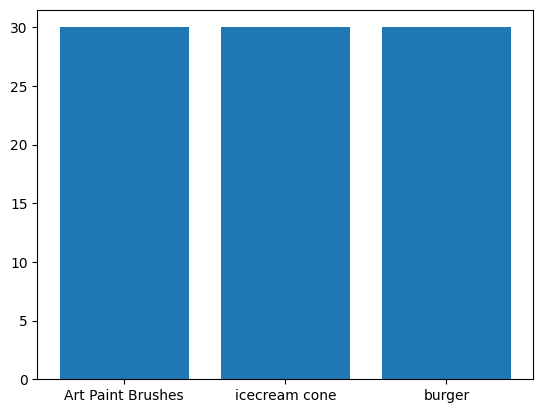

time: 212 ms (started: 2023-11-11 12:43:53 +00:00)


In [ ]:
unique,count =np.unique(target,return_counts= True)
plt.bar(categories,count)

### Step 5: Data Splitting

In [ ]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(flatten_data, target , test_size = 0.3 , random_state = 109)



time: 18.5 ms (started: 2023-11-11 12:43:56 +00:00)


### Step 6: Model Training

In [ ]:
#Support vector machine for supervised learning method classification model input and output clearly shown and given
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
        {'C':[1,10,100,1000],'kernel': ['linear']},
        {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC (probability = True)
clf = GridSearchCV(svc , param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 8s (started: 2023-11-11 12:43:57 +00:00)


### Step 7: Model Evaluation

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       2, 0, 2, 0, 1])

time: 225 ms (started: 2023-11-11 12:45:05 +00:00)


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 10.8 ms (started: 2023-11-11 12:45:06 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

time: 543 µs (started: 2023-11-11 12:45:06 +00:00)


In [ ]:
accuracy_score(y_pred, y_test)

0.7777777777777778

time: 5.94 ms (started: 2023-11-11 12:45:06 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[6, 2, 0],
       [0, 7, 0],
       [2, 2, 8]])

time: 5.7 ms (started: 2023-11-11 12:45:06 +00:00)


### Step 8: Model Saving

In [ ]:
#save the model using pickle library
import pickle
pickle.dump(clf,open('myimg_model.p','wb'))


time: 80.8 ms (started: 2023-11-11 12:45:06 +00:00)


In [ ]:
model = pickle.load(open('myimg_model.p','rb'))

time: 16.1 ms (started: 2023-11-11 12:45:06 +00:00)


### Step 9: Testing with New Image

Enter you URLhttps://img.freepik.com/free-vector/isolated-delicious-hamburger-cartoon_1308-134032.jpg?size=626&ext=jpg&ga=GA1.1.1412446893.1698883200&semt=ais
(548, 626, 3)
PREDICTED OUTPUT:burger


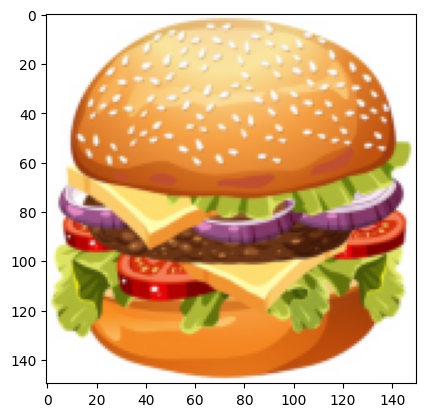

time: 2.93 s (started: 2023-11-11 12:50:02 +00:00)


In [ ]:
#testing brand new image
flat_data = []
url = input ("Enter you URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

### Libraries Used:
1. numpy:

Used for efficient numerical operations on arrays, essential for handling image data and computations.

2. os:

Employed to interact with the operating system, facilitating file and path manipulation during data loading.

3. matplotlib.pyplot:

Utilized for visualizing images, plots, and the distribution of target classes.

4. skimage.io:

Invoked for reading and loading images during the data preprocessing phase.

5. skimage.transform:

Applied for image resizing, a crucial step in standardizing input dimensions for the machine learning model.

6. sklearn.preprocessing.MinMaxScaler:

Used to normalize pixel values in image data, ensuring uniformity and aiding model convergence.
7. sklearn.model_selection.train_test_split:

Employed to split the dataset into training and testing sets, crucial for assessing model generalization.

8. sklearn.model_selection.GridSearchCV:

Utilized for hyperparameter tuning, systematically exploring parameter combinations to enhance model performance.

9. sklearn.svm.SVC:

The core library for implementing Support Vector Machines (SVM), a powerful algorithm for classification tasks.

10. sklearn.metrics.accuracy_score:

Utilized for evaluating the accuracy of the model's predictions against the actual target values.
11. sklearn.metrics.confusion_matrix:

Applied to visualize the performance of the model, showing the distribution of predicted and actual classes.

12. pickle:

Used for serializing and deserializing the machine learning model, enabling model persistence.

### Learning Points:
Data Scraping using Bing Image Downloader:

Acquired hands-on experience in using external libraries for scraping image data from the web.
Image Preprocessing Techniques (Resizing, Flattening):

Explored techniques to standardize and simplify image data, preparing it for input into machine learning models.
Data Normalization:

Understood the importance of normalizing pixel values to ensure consistent and effective model training.
Model Training using Support Vector Machine (SVM):

Gained insights into the implementation of SVM, a robust algorithm for classification tasks, suitable for image data.
Hyperparameter Tuning using GridSearchCV:

Explored the process of optimizing model performance by systematically tuning hyperparameters.
Model Evaluation using accuracy_score and confusion_matrix:

Learned how to assess the model's performance using key metrics and visualizations.
Model Saving and Loading using Pickle:

Explored techniques for saving trained models and loading them for future use, ensuring continuity in deployment.
Testing the Model with a New Image:

Demonstrated how to use the trained model to make predictions on new, unseen data.

### Why SVM is Best for This:
Effective for High-Dimensional Data:

SVM is particularly effective in high-dimensional spaces, making it suitable for image data represented as multi-dimensional arrays.
Robust to Overfitting:

SVMs are less prone to overfitting, providing a good balance between bias and variance. This is crucial for achieving generalization in image classification tasks.
Versatility in Kernel Functions:

SVMs offer versatility in choosing kernel functions, allowing adaptation to different types of data distributions. This flexibility is beneficial for handling diverse image features.
Ability to Handle Non-Linear Data:

SVMs, especially when using non-linear kernel functions like radial basis function (RBF), can effectively model complex relationships in image data.
Global Optimization:

SVM aims to find the hyperplane that maximally separates different classes, providing a robust solution that considers the entire dataset.
Well-Suited for Small to Medium-Sized Datasets:

In the context of image classification with a limited dataset, SVMs can yield good results without requiring an excessively large amount of training data.

## Conclusion:
This project not only achieved its goal of creating an image classifier but also provided valuable insights into the various stages of a machine learning project. From data collection to model training, evaluation, and deployment, the project covered essential concepts and techniques. The choice of SVM as the classification algorithm proved effective for image data, and the achieved accuracy, though reasonable, opens avenues for further exploration and improvement. The skills developed during this project are transferable to a wide range of image classification tasks, making it a valuable learning experience.